# Japan: Country of the Rising Women
** How modernizing the concept of work could create equal opportunities for men and women in Japan**

This past summer I was given the opportunity to work in Japan for three months. Aside from working in a large open space office, the second difference to Germany (where I usually live and work) was that there were barely any female software engineers aside from me - and none of them were Japanese.

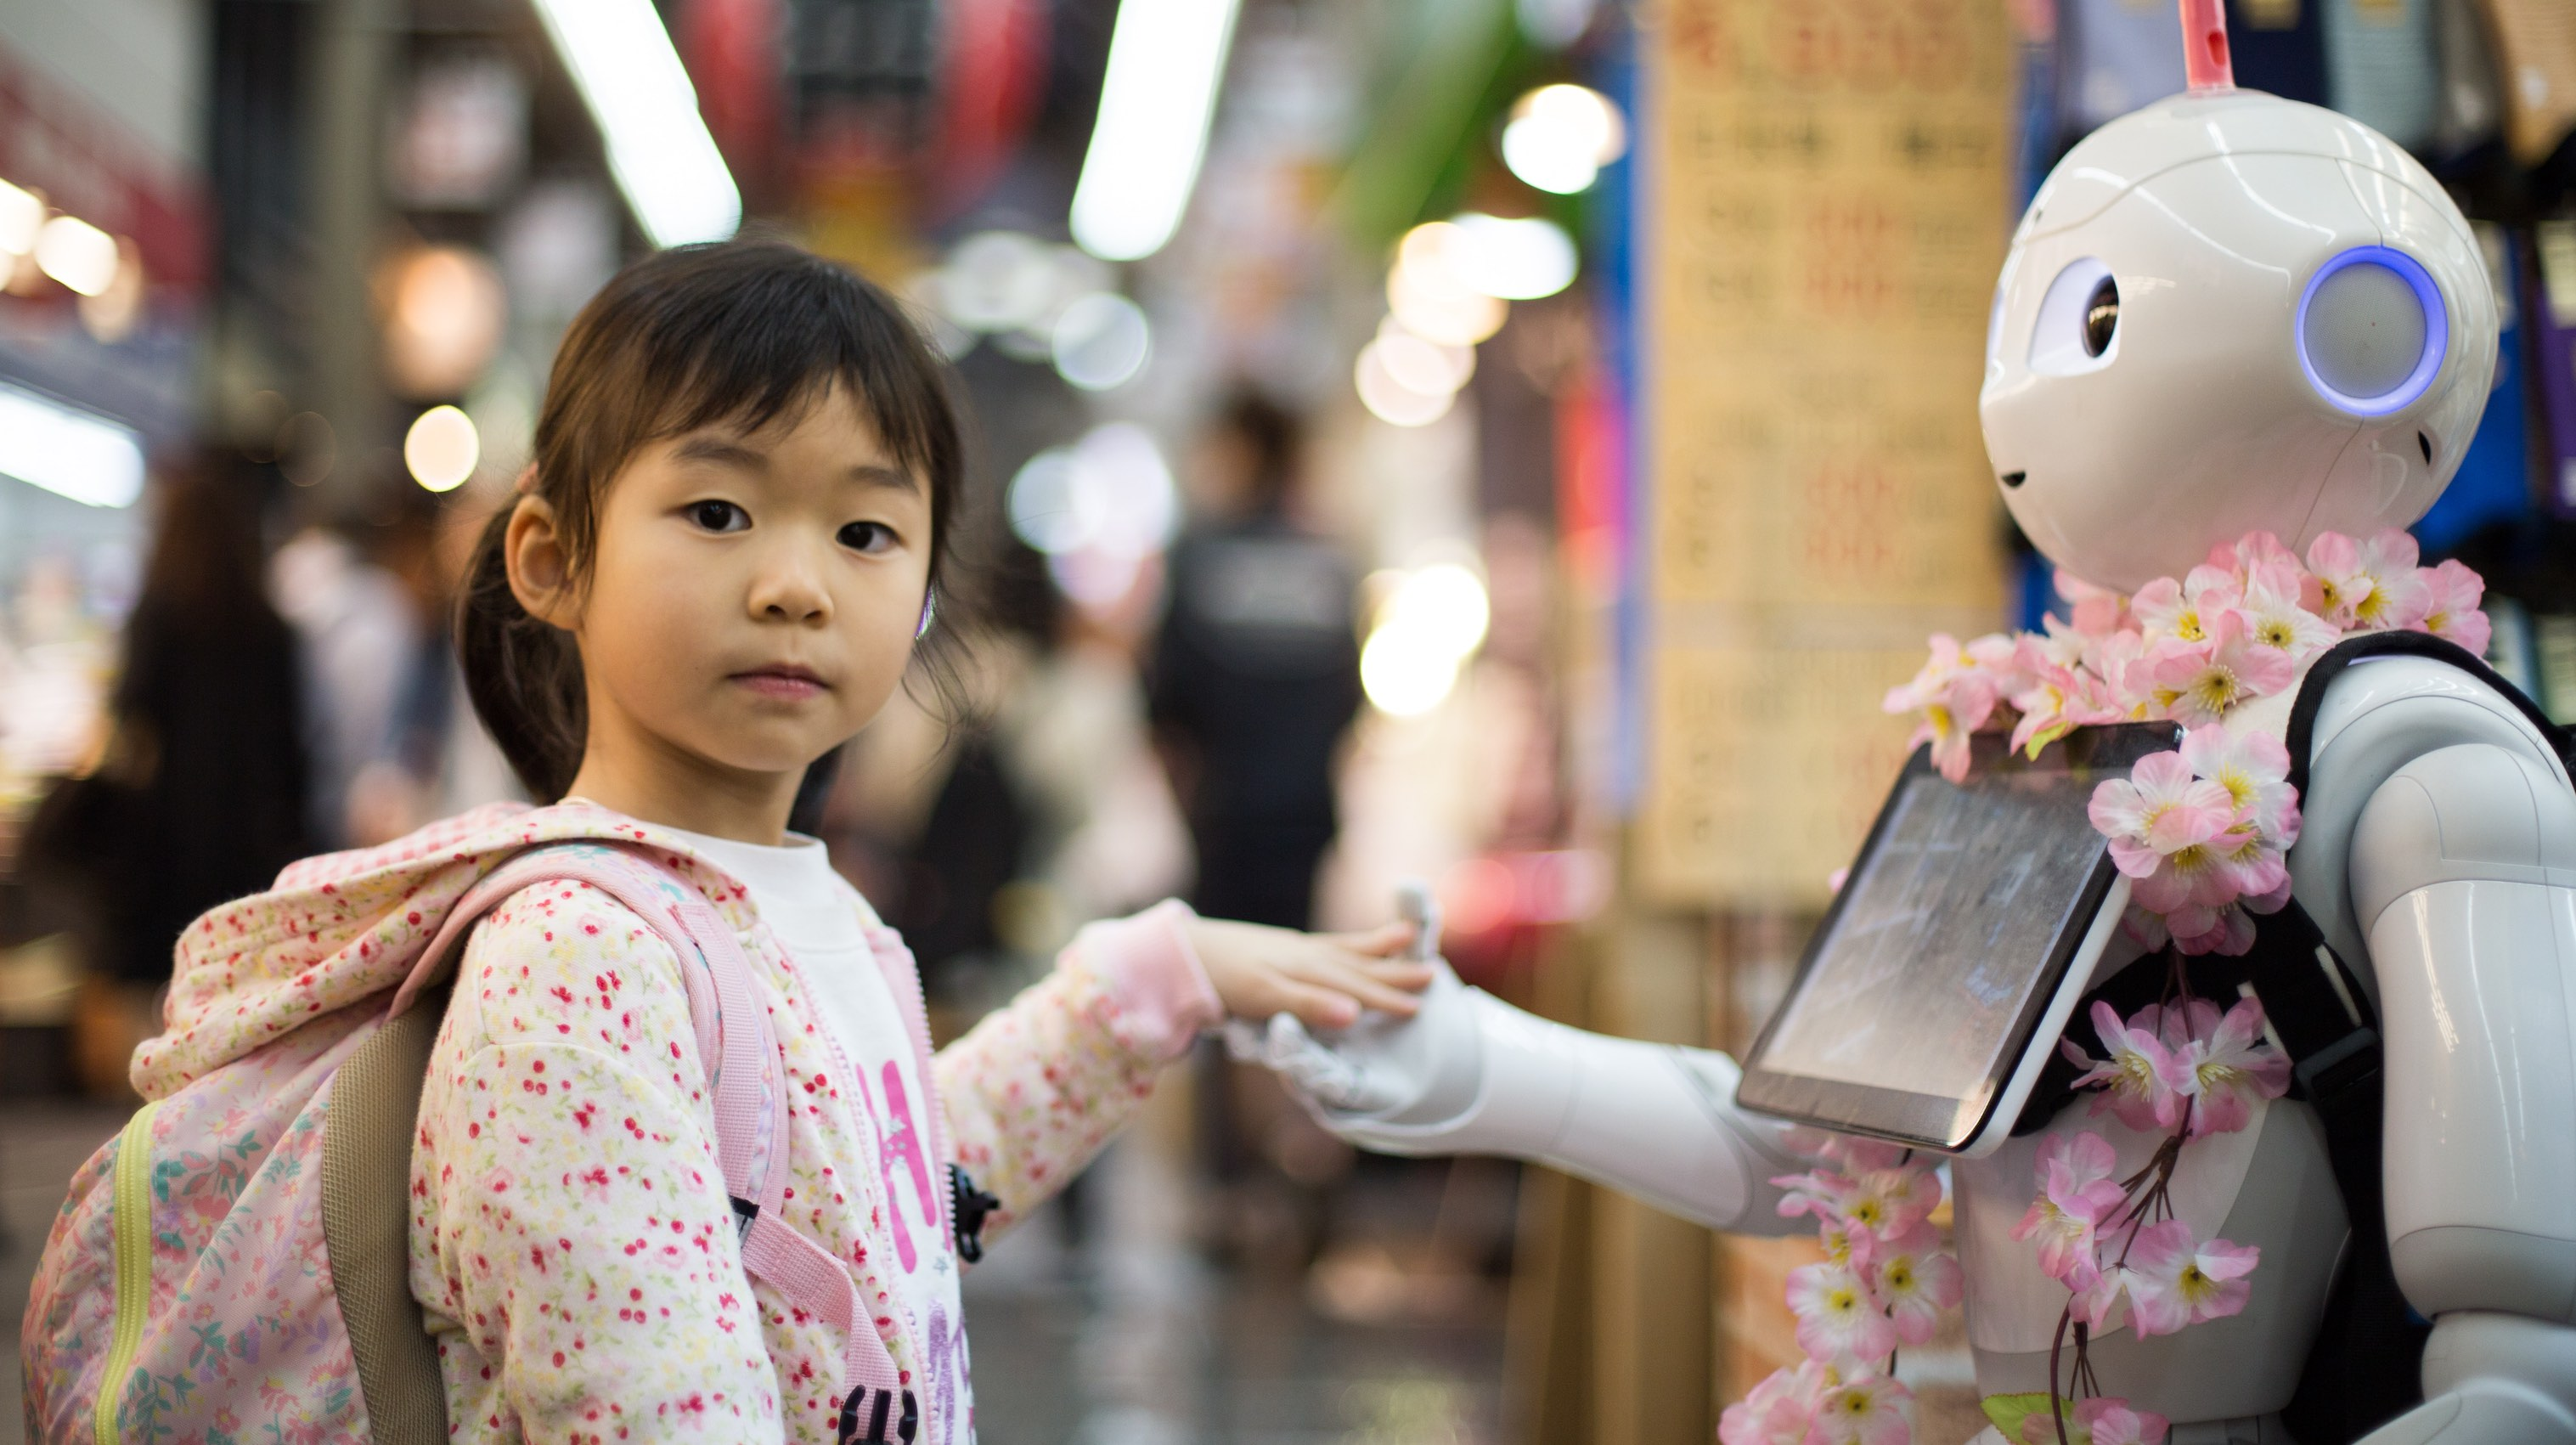
Photo by Andy Kelly on Unsplash

In [ ]:
import numpy as np

import pandas as pd
pd.set_option('display.max_colwidth', -1)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load survey data from 2019
multiple_choice_responses_2019= pd.read_csv("../input/kaggle-survey-2019/multiple_choice_responses.csv")

# Load survey data from 2018
multiple_choice_responses_2018 = pd.read_csv("../input/kaggle-survey-2018/multipleChoiceResponses.csv")

# Load survey data from 2017
multiple_choice_responses_2017 = pd.read_csv("../input/kaggle-survey-2017/multipleChoiceResponses.csv",encoding='ISO-8859-1')

In [ ]:
### Preprocessing ###

# Copy original responses for further processing
responses_2017_mod = multiple_choice_responses_2017.copy()
responses_2018_mod = multiple_choice_responses_2018.copy()
responses_2019_mod = multiple_choice_responses_2019.copy()

# Drop first row, which does not contain an actual data point 
responses_2018_mod = responses_2018_mod.drop(responses_2018_mod.index[0]).reset_index(drop=True)
responses_2019_mod = responses_2019_mod.drop(responses_2019_mod.index[0]).reset_index(drop=True)

# Rename columns for more easier handling
questions_to_features_2017 = {'GenderSelect' : 'Gender'}

questions_to_features_2018 = {'Q1' : 'Gender',
                              'Q3' : 'Country',
                              'Q5' : 'Major',
                              'Q6' : 'Occupation'}

questions_to_features_2019 = {'Q1' : 'Age',
                              'Q2' : 'Gender',
                              'Q3' : 'Country',
                              'Q4' : 'Education',
                              'Q5' : 'Occupation',
                              'Q10' : 'Salary'}

responses_2017_mod.rename(columns = questions_to_features_2017, inplace = True)
responses_2018_mod.rename(columns = questions_to_features_2018, inplace = True)
responses_2019_mod.rename(columns = questions_to_features_2019, inplace = True)

### Utility functions ###
def convert_to_percentage(df):
    df = df.fillna(0)
    df['sum'] = df.sum(axis = 1)

    for col in df.columns:
        df[col] = (df[col] / df['sum'] * 100).round(1)

    df = df.drop('sum', axis=1)
    
    return df

def convert_range_to_mean(range_str):
    if any(i.isdigit() for i in range_str):
        range_str = range_str.replace(',', '').replace('+', '').replace(' ', '').replace('>', '').replace('<', '').replace('$', '').replace('years', '').replace('employees', '')
        range_array = np.array(range_str.split('-'))
        range_array = range_array.astype(np.float)
        return np.mean(range_array)
    else:
        return 0

def create_dict_from_unique_values(df, column_name):
    unique_values = df[column_name].unique()
    dicts = {}
    for i in range(len(unique_values)):
        if type(unique_values[i]) is str:
            dicts[unique_values[i]] = convert_range_to_mean(unique_values[i])
        else:
            dicts[unique_values[i]] = 0
    return dicts

# Quick Overview of the Japanese Kaggle Community
Before we dive in, let's get a quick overview of the data we are working with.

The Japanese Kaggle community has doubled over the past three years. This year, **673 repondents from Japan** participated in the Kaggle survey.** This ranks Japan as the 4th biggest community in the Kaggle survey** after India, United States of America, Brazil, and before Russia.

In [ ]:
def get_participation_by_country(df):
    df_mod = df[df.Country != 'Other']
    df_mod = df_mod.groupby(['Country']).agg(Number_of_Respondents = ('Country', 'count')).sort_values('Number_of_Respondents', ascending=False).reset_index()
    df_mod['Number_of_Respondents_percentage'] = df_mod['Number_of_Respondents'].apply(lambda x: (x/df_mod.Number_of_Respondents.sum()*100).round(1))
    return df_mod

# Get annual participation by country in percent
participation_2019 = get_participation_by_country(responses_2019_mod)
participation_2018 = get_participation_by_country(responses_2018_mod)
participation_2017 = get_participation_by_country(responses_2017_mod)

# Get annual participation for Japan in percent
participation_japan = pd.DataFrame(data = [participation_2017[participation_2017.Country == 'Japan'].Number_of_Respondents_percentage,
                                           participation_2018[participation_2018.Country == 'Japan'].Number_of_Respondents_percentage,
                                           participation_2019[participation_2019.Country == 'Japan'].Number_of_Respondents_percentage],
                                   index = ['2017','2018', '2019'])    

participation_japan['percentage'] = participation_japan.max(axis=1)

# Plot figure
fig = participation_japan['percentage'].plot(kind = 'bar',
                                             color = ['#C70025'])
fig.set_title('Percentage of Japanese Respondents', fontsize = 15)                                            
plt.gcf().set_size_inches(5, 5)
plt.xticks(rotation = 0, fontsize = 15)
plt.xlabel('Years of Survey', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
fig.set_ylim(0, 5)
plt.show()

def highlight_japan(x):
    if x.Country == 'Japan':
        return ['background-color: #ffe2d8']*3
    else:
        return ['background-color: ']*3

participation_2019.head().style.set_caption('Countries Ranked By Number of Respondents in 2019 Kaggle Survey').apply(highlight_japan, axis=1)

Japan's gender distribution in absolute numbers of this years Kaggle survey respondents is as follows:

In [ ]:
print(responses_2019_mod[responses_2019_mod.Country == 'Japan']['Gender'].value_counts())

# A Developed Country Scoring Below Average on Gender Equality
In 2018, **Japan ranked 110 out of 149 countries in the Gender Equality Index ** [5]. While the top three are Iceland, Norway, and Finland, and the bottom three are Iraq, Pakistan, and Yemen, Japan ranks between Mauritius and Belize. On a positive note, the gender pay-gap was not the main contributor for Japan’s overall poor ranking. The study suggest that **Japan ranks above average on wage equality for similar work** [5]. This is inline with this year’s Kaggle survey which shows that male and female data scientists are compensated similarly.

In [ ]:
# Convert categorical salary column to numerical
label_encoding_salary = {}
label_encoding_salary['Salary'] = create_dict_from_unique_values(responses_2019_mod, 'Salary')
responses_2019_mod.replace(label_encoding_salary, inplace = True)

# Select data scientists from JP and USA with realistic salary
data_scientists_selection = responses_2019_mod[((responses_2019_mod.Country == 'Japan') 
                                                | (responses_2019_mod.Country =='United States of America')) 
                                               & ((responses_2019_mod.Gender == 'Male') 
                                                  | (responses_2019_mod.Gender ==  'Female'))
                                               & (responses_2019_mod.Salary > 20000)
                                               & (responses_2019_mod.Occupation == 'Data Scientist')]

# Plot figure
fig = sns.boxplot(x = "Country", 
                  y = "Salary", 
                  hue = "Gender", 
                  palette = ['#C70025', 'white'], 
                  data = data_scientists_selection, 
                  fliersize = 0)
fig.set_title('Annual Compensation of Data Scientists on Kaggle [USD]', fontsize = 15)
fig.set_ylim(0, 230000)
plt.gcf().set_size_inches(6, 5)
plt.xticks(rotation = 0, fontsize = 15)
plt.ylabel(ylabel = 'Salary', fontsize = 15)
plt.xlabel(xlabel = 'Country', fontsize = 15)
plt.legend(bbox_to_anchor = (0.5,1.2), loc = "center")
plt.show()

print('Disclaimer: \nThis analysis excludes unrealistic annual compensations of less than 20.000 USD for Data Scientists in high cost countries like Japan and USA.')
data_scientists_selection.groupby(['Country', 'Gender']).agg(Number_of_Respondents = ('Salary', 'count')).style.set_caption('Database for Salary Comparison of Data Scientists on Kaggle')

In reality, Japan’s overall rank is negatively impacted by its gender imbalance in the labour force and political empowerment [5]. In this years Kaggle survey, **only 10% of the Japanese workforce was female**. Additionally, the 2018 Kaggle survey shows that the percentage of working women in Japan is significantly lower than in the rest of the world. Also, **none of the working female respondents held the title of a Chief Officer**. This reflects the fact that none of the top 100 public companies in Japan have female CEOs [3].

In [ ]:
# Select Japanese Men and Women
japan_2019_overview = responses_2019_mod[(responses_2019_mod.Country == 'Japan')
                                         & (responses_2019_mod.Gender != 'Prefer not to say')]

# Create new feature of employment status based on 'Occupation' column
japan_2019_overview['Status'] = japan_2019_overview.Occupation.apply(lambda x: 'Employed' if ((x != 'Student') & (x != 'Not employed')) else x)

# Group by new status 'Status' and Gender
japan_2019_overview= japan_2019_overview.groupby(['Status', 'Gender']).agg(Number_of_respondents = ('Occupation', 'count')).reset_index()
japan_2019_overview = japan_2019_overview.pivot(index='Status',columns='Gender')['Number_of_respondents']

# Plot figure
fig = japan_2019_overview.plot(kind='bar',
                               color=['#C70025', 'white'],
                               linewidth=1,
                               edgecolor='k')
fig.set_title('Gender Dsitribution of Japanese Kagglers', fontsize = 15)                                            

plt.gcf().set_size_inches(8, 5)
plt.xticks(rotation = 0, fontsize = 15)
plt.xlabel('Employment Status', fontsize = 15)
plt.ylabel('Number of Respondents', fontsize = 15)
plt.legend(bbox_to_anchor = (0.5,1.2), loc = "center")
plt.show()

In [ ]:
# Summarize other countries as rest of the world (RoW)
responses_2019_mod.Country = responses_2019_mod.Country.apply(lambda x: x if x == 'Japan' else 'RoW')

# Modify 'Occupation' to categories regarding leading role
positions_grouped = {'Data Scientist' : 'Non-leading position', 
                     'Research Scientist' : 'Non-leading position', 
                     'Manager' : 'Leading position',
                     'Research Assistant' : 'Leading position',
                     'Data Analyst': 'Non-leading position', 
                     'Software Engineer': 'Non-leading position', 
                     'Product/Project Manager'  : 'Leading position',
                     'Consultant': 'Non-leading position', 
                     'Marketing Analyst': 'Non-leading position', 
                     'Principal Investigator': 'Leading position',
                     'Data Engineer': 'Non-leading position',
                     'Business Analyst': 'Non-leading position',
                     'Developer Advocate': 'Non-leading position',
                     'Salesperson': 'Non-leading position',
                     'Statistician': 'Non-leading position',
                     'DBA/Database Engineer': 'Non-leading position',
                     'Data Journalist': 'Non-leading position'}

leading_positions = responses_2018_mod.copy()
leading_positions.Occupation.replace(positions_grouped, inplace = True)

# Prepare data
def get_gender_distribution_by_position(df):
    df = df[(df.Occupation != 'Student')
            & (df.Occupation != 'Other') 
            & (df.Occupation != 'Not employed') 
            & ((df.Gender == 'Female') | (df.Gender == 'Male'))] 

    df = df.groupby(['Occupation', 'Gender']).Country.count().to_frame().reset_index() 
    df = df.pivot(index='Occupation',columns='Gender')['Country']
    
    df = convert_to_percentage(df)
    return df

gender_distribution_position = pd.DataFrame(data = [get_gender_distribution_by_position(leading_positions[leading_positions.Country == 'Japan']).Female, 
                                                    get_gender_distribution_by_position(leading_positions[leading_positions.Country != 'Japan']).Female],
                                            index = ['Japan','RoW'])    

# Plot figure
fig = gender_distribution_position.T.plot(kind = 'bar',
                                          color = ['#C70025', '#ffe2d8'])
fig.set_title('Female Kagglers in the Workforce', fontsize = 15)                                            

plt.gcf().set_size_inches(8,5)
plt.xticks(rotation = 0, fontsize = 15)
plt.xlabel('Position', fontsize = 15)
plt.ylabel('Percentage of Respondents', fontsize = 15)
plt.legend(bbox_to_anchor = (0.5,1.2), loc = "center")
plt.show()

When the Olympics open next summer, Japan will prove its technological advancements once more with its latest robots and possibly a flying car. From this year's Kaggle survey, it is obvious that Japanese Kagglers use state of the art algorithms in their everyday life. Especially, the percentage of **respondents using Gradient Boosting Machines and CNN is significantly higher in Japan than in the rest of the world**. Japan seems to have understood that Gradient Boosting Machines can dominate over Linear Regression and Decision Trees as it can be seen in many Kaggle competitions. Furthermore, in Japan CV methods are used more commonly in the rest of the world, which explains the higher use of CNNs.

In [ ]:
# Rename columns for better (human) handling
questions_to_features_algo = {'Q24_Part_1' : 'Linear or Logistic Regression',
                              'Q24_Part_2' : 'Decision Trees or Random Forests',
                              'Q24_Part_3' : 'Gradient Boosting Machines',
                              'Q24_Part_4' : 'Bayesian Approaches',
                              'Q24_Part_5' : 'Evolutionary Approaches',
                              'Q24_Part_6' : 'Dense Neural Networks',
                              'Q24_Part_7' : 'Convolutional Neural Networks',
                              'Q24_Part_8' : 'Generative Adversarial Networks',
                              'Q24_Part_9' : 'Recurrent Neural Networks',
                              'Q24_Part_10' : 'Transformer Networks',
                              'Q24_Part_11' : 'No ML algorithms',
                              'Q24_Part_12' : 'Other ML algorithms',
                              'Q26_Part_1' : 'General purpose image/video tools',
                              'Q26_Part_2' : 'Image segmentation methods',
                              'Q26_Part_3' : 'Object detection methods',
                              'Q26_Part_4' : 'Image classification methods',
                              'Q26_Part_5' : 'Generative Networks',
                              'Q26_Part_6' : 'No CV method',
                              'Q26_Part_7' : 'Other CV method',
                              'Q27_Part_1' : 'Word embeddings/vectors',
                              'Q27_Part_2' : 'Encoder-decoder models',
                              'Q27_Part_3' : 'Contextualized embeddings',
                              'Q27_Part_4' : 'Transformer language models',
                              'Q27_Part_5' : 'No NLP methods',
                              'Q27_Part_6' : 'Other NLP methods'}
                            
responses_2019_mod.rename(columns = questions_to_features_algo, inplace = True)

# Prepare lists
algorithms_ml = ['Linear or Logistic Regression',
                 'Decision Trees or Random Forests',
                 'Gradient Boosting Machines',
                 'Bayesian Approaches',
                 'Evolutionary Approaches',
                 'Dense Neural Networks',
                 'Convolutional Neural Networks',
                 'Generative Adversarial Networks',
                 'Recurrent Neural Networks',
                 'Transformer Networks',
                 #'No ML algorithms',
                 #'Other ML algorithms'
                ]

algorithms_cv = ['General purpose image/video tools',
                 'Image segmentation methods',
                 'Object detection methods',
                 'Image classification methods',
                 'Generative Networks',
                 #'No CV method',
                 #'Other CV method'
                ]

algorithms_nlp = ['Word embeddings/vectors',
                  'Encoder-decoder models',
                  'Contextualized embeddings',
                  'Transformer language models',
                  #'No NLP methods',
                  #'Other NLP methods'
                 ]

algorithms = algorithms_ml + algorithms_cv + algorithms_nlp

# Prepare data
for i in range(len(algorithms)):
    responses_2019_mod[algorithms[i]] = responses_2019_mod[algorithms[i]].apply(lambda x: 1 if (type(x) is str) else 0)

algorithms_2019 = responses_2019_mod.groupby('Country')[algorithms].sum()
algorithms_2019 = convert_to_percentage(algorithms_2019)

# Plot figures
fig, axes = plt.subplots(1,3)
algorithms_2019[algorithms_ml].T.plot(kind = 'bar', 
                                      color = ['#C70025', '#ffe2d8'], 
                                      ax = axes[0], 
                                      title = 'ML Algorithms used by Kagglers', 
                                      fontsize = 15)
algorithms_2019[algorithms_cv].T.plot(kind = 'bar', 
                                      color = ['#C70025', '#ffe2d8'], 
                                      ax = axes[1], 
                                      title = 'CV Methods used by Kagglers', 
                                      fontsize = 15)
algorithms_2019[algorithms_nlp].T.plot(kind = 'bar', 
                                       color = ['#C70025', '#ffe2d8'], 
                                       ax = axes[2], 
                                       title = 'NLP Methods used by Kagglers', 
                                       fontsize = 15)

fig.set_size_inches(18,5)

for i in range(3):
    axes[i].set_ylim(0, 18)
    axes[i].set_xlabel('Methods', fontsize = 15)
    axes[i].set_ylabel('Percentage of Used Methods', fontsize = 15)
    axes[i].get_legend().remove()

fig.legend(bbox_to_anchor=(0.77,0.1), loc="center", labels=['Japan', 'RoW'])
plt.show()

Although, Japan is technologically highly advanced, women are also underrepresented in the STEM fields. Although people in the Kaggle community are assumably interested in data science and machine learning, the 2018 survey shows that **only 60 % of Japanese female Kagglers have majored in a STEM discipline**.

In [ ]:
# Dictionary to group STEM disciplines
studies_grouped = {'Computer science (software engineering, etc.)' : 'STEM',
                   'Engineering (non-computer focused)' : 'STEM',
                   'Mathematics or statistics' : 'STEM', 
                   'Physics or astronomy' : 'STEM',
                   'Information technology, networking, or system administration' : 'STEM',
                   'Environmental science or geology' : 'STEM',
                   'Medical or life sciences (biology, chemistry, medicine, etc.)' : 'STEM',
                   'A business discipline (accounting, economics, finance, etc.)' : 'Business',
                   'Social sciences (anthropology, psychology, sociology, etc.)' : 'Social Sciences',
                   'Humanities (history, literature, philosophy, etc.)' : 'Humanities',
                   'Fine arts or performing arts' : 'Arts',
                   'I never declared a major' : 'No major'}

responses_2018_mod.Major.replace(studies_grouped, inplace = True)

# Prepare data
df_female = responses_2018_mod[(responses_2018_mod.Country == 'Japan')
                               & (responses_2018_mod.Gender == 'Female')].groupby('Major')['Major'].count()
df_male = responses_2018_mod[(responses_2018_mod.Country == 'Japan')
                             & (responses_2018_mod.Gender == 'Male')].groupby('Major')['Major'].count()

gender_distribution_japan = pd.DataFrame(data = [df_female, df_male],index = ['Female','Male'])    

gender_distribution_japan['total'] = [df_female.sum(), df_male.sum()]
gender_distribution_japan.fillna(0)

for col in gender_distribution_japan.columns:
    gender_distribution_japan['{} (%)'.format(col)] = gender_distribution_japan[col]/gender_distribution_japan['total']*100

rearranged_columns = ['STEM (%)',
                      'Business (%)',
                      'Social Sciences (%)',
                      'Humanities (%)',
                      'Arts (%)',
                      'Other (%)',
                      'No major (%)' ]

# Plot figure
fig = gender_distribution_japan[rearranged_columns].T[['Female']].plot(kind='bar',color=['#C70025'])
plt.gcf().set_size_inches(15,5)
fig.set_title('Female Participation in Academic Disciplines in Japan', fontsize = 15)
plt.xticks(np.arange(7),
           ('STEM', 'Business', 'Social Sciences', 'Humanities', 'Arts', 'Other', 'No major'), 
           rotation = 0,
           fontsize = 15)
plt.xlabel('Academic Discipline', fontsize = 15)
plt.ylabel('Percentage of Female Respondents', fontsize = 15)
fig.get_legend().remove()
plt.show()

Interestingly, in absolute numbers female Kagglers are only dominating the arts major. Although, humanities is the second most popular major in female Kagglers, there are more male Kagglers with a major in humanities than female Kagglers in absolute numbers.

In [ ]:
# Prepare list
rearranged_columns = ['Social Sciences',
                      'Humanities',
                      'Arts']

# Plot figure
fig = gender_distribution_japan[rearranged_columns].T[['Male','Female']].plot(kind='bar',
                                                                              color=['white','#C70025'],
                                                                              linewidth=1,
                                                                              edgecolor='k')
fig.set_title('Gender Distribution in Academic Disciplines in Japan', fontsize = 15)                                            
plt.gcf().set_size_inches(8,5)
plt.xticks(rotation = 0, fontsize = 15)
plt.xlabel('Academic Discipline', fontsize = 15)
plt.ylabel('Number of Respondents', fontsize = 15)
plt.legend(bbox_to_anchor=(0.5,1.2), loc="center",labels=['Male','Female'])
plt.show()


non_stem_fields_japan = responses_2018_mod[(responses_2018_mod.Country == 'Japan')
                                           & (responses_2018_mod.Gender != 'Prefer not to say') 
                                           & ((responses_2018_mod.Major == 'Social Sciences') 
                                              | (responses_2018_mod.Major == 'Humanities')
                                              | (responses_2018_mod.Major == 'Arts'))]
non_stem_fields_japan = non_stem_fields_japan.groupby(['Major', 'Gender']).Occupation.unique().to_frame()
non_stem_fields_japan.head(6).style.set_caption('Occupations of Japanese Kagglers Who Have Not Majored in STEM Fields')

# Work-Life-Imbalance
Juggling a career and a family is a challenge for everybody. However, the Japanese infamous work ethic makes it especially difficult [6]. On average men in Japan work 46% more hours than men in the US [3].

Japanese people’s devotion to their work and the gender imbalance in the workforce have the same origin [4]. Today’s Japanese society is strongly influenced by the Confucian ideas that were imported from China around the 6th century. For both men and women loyality was a shared expectation: Men were expected to be loyal to their lords, whereas women were expected to be loyal to their families [4]. **Today, the Japanese term ‘salaryman’ showcases that men are still considered the bread winners while women are the caretakers** [6].

The root of of women’s absence in leading positions can be found in the education. Assumably, a potential candidate for a leading position should have appropriate work experience and a corresponding education. However, in the 1980s women still preferred attending a two-year ‘junior college’, which had an emphasis on home economics, to a university [1]. This explains the underrepresentation of women in the pool of potential candidates for leading positions. Additionally, **this years Kaggle survey confirms that Japanese female Kagglers who went to university around the 1990s also preferred a Bachelor’s degree to a Master’s degree**.

In [ ]:
# Convert categorical age column to numerical
label_encoding_age = {}
label_encoding_age['Age'] = create_dict_from_unique_values(responses_2019_mod, 'Age')
responses_2019_mod.replace(label_encoding_age, inplace = True)

# Get Japanese females who went to university
japan_females_university_age_2019 = responses_2019_mod[(responses_2019_mod.Country == 'Japan')
                                                       & (responses_2019_mod.Gender== 'Female')
                                                       & (responses_2019_mod.Education != 'No formal education past high school')]

# Prepare data
def reached_unverisity_age_at(current_age):
    if current_age <= 27:
        return 'Later than 2010s'
    elif current_age <= 37:
        return 'Early 2000s'
    elif current_age <=47:
        return 'Around 1990'
    else:
        return '1980s and earlier'
    
japan_females_university_age_2019['university_age_reached'] = japan_females_university_age_2019.Age.apply(lambda x: reached_unverisity_age_at(x))
japan_females_university_age_2019 = japan_females_university_age_2019.groupby(['university_age_reached', 'Education']).Gender.count().to_frame().reset_index()
japan_females_university_age_2019 = japan_females_university_age_2019.pivot(index='university_age_reached',columns='Education')['Gender']#.reset_index(drop=True)

japan_females_university_age_2019 = convert_to_percentage(japan_females_university_age_2019)

# Plot figure
degrees = ['Some college/university study without earning a bachelor’s degree', 'Bachelor’s degree', 'Master’s degree']

fig = japan_females_university_age_2019[degrees].plot(kind = 'bar', 
                                                      color=['#ffe2d8', "#ff9999", "#C70025"])
fig.set_title('Education Level by When Graduated from High School', fontsize = 15)                                            

plt.gcf().set_size_inches(10,5)
plt.xticks(rotation=0, fontsize = 15)
plt.xlabel('Year when Graduated from High School', fontsize = 15)
plt.ylabel('Percentage of Respondents', fontsize = 15)
plt.legend(bbox_to_anchor=(0.5,1.3), loc="center")
plt.show()

print('Disclaimer: The number of respondents aged higher than 47 was very low. It is assumed that this group of Japanese females that are interested in an online data science community are a rarity for their generation. Under this aspect, the high level of education seems to be no surprise.')

The reality is, that 75% of Japanese women are not interested in leading positions due to the additional over-time [3]. This does not suggest any lack in women’s work ethic but the social expectation that women have to prioritise their role as caretakers. Women in Japan spend five times more time on unpaid tasks, such as  household work, than men, whereas the ratio is two to one for the global average [2] [5]. Additionally to the double burden, the Japanese culture’s focus on collectivism has been discouraging women to prioritise their career over their families [6]. 

# Raised with Strong Female Role Models

But now Japanese women are ready to challenge the outdated gender roles. This is a generation of women raised by Studio Ghibli Films which have strong independent female protagonists instead of princesses. In addition, there are also non-fictional role models in the STEM field, such as [Masako Wakamiya ](https://asia.nikkei.com/Business/Technology/Meet-the-84-year-old-Japanese-app-developer-who-inspired-Tim-Cook2), the oldest iPhone app developer at the age of 84, or [Hiromi Ozaki a.k.a. Sputniko!](https://sputniko.com/), an artist who has studied mathematics and computer science. And finally, [Women in Data Science](https://www.widsconference.org/) has expanded to Japan in 2019. 
> “Many of my movies have strong female leads - brave, self-sufficient girls that don't think twice about fighting for what they believe with all their heart.”
― Hayao Miyazaki 

The change of younger women’s attitude towards their socially expected role in Japan is visible in the past three annual Kaggle surveys. Not only are they attaining higher levels of education but there has been a **slight increase of women in the workforce in Japan**.

Unfortunately, the percentage of female Japanese students in the Kaggle community was lower in 2019 than in 2017. Recent studies suggest, that more Japanese women have been attending university over the past decades [2] and now account for 47% of students in Japanese universities [3]. This is expected to potentially double the percentage of women in leading positions in the next decade [1]. However, **in this year's Kaggle survey only 3 out of 74 Japanese students were female**.

In [ ]:
# Prepare data
def get_gender_distribution_by_country(df):
    df_mod = df[(df.Gender == 'Female')| (df.Gender == 'Male')]
    df_mod.Country = df_mod.Country.apply(lambda x: x if x == 'Japan' else 'Row')
    df_mod = df_mod.groupby(['Country', 'Gender']).agg(Number_of_respondents = ('Gender', 'count' )).reset_index()
    df_mod = df_mod.pivot(index='Country',columns='Gender')['Number_of_respondents']
    df_mod = convert_to_percentage(df_mod)
    
    return df_mod

students = pd.DataFrame(data = [get_gender_distribution_by_country(responses_2017_mod[responses_2017_mod.StudentStatus == 'Yes']).Female, 
                                get_gender_distribution_by_country(responses_2018_mod[responses_2018_mod.Occupation == 'Student']).Female,
                                get_gender_distribution_by_country(responses_2019_mod[responses_2019_mod.Occupation == 'Student']).Female],
                        index = ['2017','2018','2019'])  

working_people = pd.DataFrame(data = [get_gender_distribution_by_country(responses_2017_mod[((responses_2017_mod.EmploymentStatus == 'Independent contractor, freelancer, or self-employed') |
                                                                                             (responses_2017_mod.EmploymentStatus == 'Employed full-time') |
                                                                                             (responses_2017_mod.EmploymentStatus == 'Employed part-time'))]).Female, 
                                      get_gender_distribution_by_country(responses_2018_mod[((responses_2018_mod.Occupation != 'Student') & 
                                                                                             (responses_2018_mod.Occupation != 'Not employed'))]).Female,
                                      get_gender_distribution_by_country(responses_2019_mod[((responses_2019_mod.Occupation != 'Student') & 
                                                                                             (responses_2019_mod.Occupation != 'Not employed'))]).Female],
                              index = ['2017','2018','2019'])  
# Plot figures
fig, axes = plt.subplots(1,2)

working_people.plot(kind = 'bar',
                    color = ['#C70025', '#ffe2d8'], 
                    ax = axes[0], 
                    title = 'Workforce', 
                    fontsize = 15)

students.plot(kind ='bar', 
              color = ['#C70025', '#ffe2d8'], 
              ax = axes[1], 
              title = 'Students', 
              fontsize = 15)

fig.set_size_inches(12,5)

for i in range(2):
    axes[i].set_ylim(0, 25)
    axes[i].tick_params(labelrotation = 0)
    axes[i].set_xlabel('Year of Survey', fontsize = 15)
    axes[i].set_ylabel('Percentage of Females', fontsize = 15)
    axes[i].get_legend().remove()

fig.legend(bbox_to_anchor=(0.5,1.1), loc="left", labels = ['Japan', 'RoW'])
plt.show()

# The Economic Cost of Gender Inequality
This gender imbalance comes with an economic cost [3]: On the one hand, **Japan is an ageing country and struggling with depopulation**. On the other hand, there is an increasing skill shortage and there are not enough men in the workforce to ensure economic growth [1]. Furthermore, women’s ambitions to have a career cannot only be seen in the increase of women in the workforce but in the drop in the marriage rate in recent years [1]. This will contribute to the depopulation and continues the vicious cycle of skill shortage if Japanese society and companies do not take any actions immediately.

# A Suggestion: Flexible Working Hours and Remote Work
To make it easier for employees to handle a career and a family at the same time, companies should rethink the concept of work. Takeda, a Japanese pharmaceutical company, reached their goal of 30% of new managers being females by e.g. including flexible working hours [3]. Modernising the concept of work will not only benefit women in Japan. Considering the ageing population and the dropping marriage rate in Japan, ** single ‘salarymen’ will be dependent on remote work or flexible working hours as well to take care of their parents**.

The age of digitisation will not only support the new concept of work but will also create job opportunities suited for it. Current technology can shift the work experience away from a 9 to 5 “face time” culture to flexible working hours and remote or mobile work. Also, **occupations which require more time for analysis and programming than physical presence, such as software engineers or data scientists, are especially well suited for new working styles**.

In [ ]:
# Get working people
working_people = responses_2018_mod[(responses_2018_mod.Occupation != 'Student') 
                                    & (responses_2018_mod.Occupation != 'Other') 
                                    & (responses_2018_mod.Occupation != 'Not employed')]

# Convert categorical column (Q23: time spent coding) to numerical column
time_spent_coding = {'0% of my time' : 0,
                     '75% to 99% of my time' : 88,
                     '50% to 74% of my time': 63,
                     '100% of my time' : 100, 
                     '25% to 49% of my time' : 38,
                     '1% to 25% of my time' : 13}
            
working_people.Q23.replace(time_spent_coding, inplace=True)

# Prepare data
working_people = working_people.groupby('Occupation').Q23.mean().reset_index().sort_values('Q23', ascending = False)

# Plot figure
fig = working_people.set_index('Occupation').Q23.plot(kind = 'bar',
                                                      color = ['#C70025'])

fig.set_title('Percentage of Work Time Spent Programming by Occupation', fontsize = 15)                                            

plt.gcf().set_size_inches(20,6)
plt.xlabel('Occupation', fontsize = 15)
plt.ylabel('Percentage of Working Time', fontsize = 15)
fig.set_ylim(0, 105)
plt.show()

# Conclusion
The past three annual Kaggle surveys and current studies suggest that Japanese women want to have a career for themselves but are still struggling with cultural expectations. Overall, women are underrepresented in the workforce as well as in STEM disciplines. However, the increase of females in the workforce and dropping marriage rates suggest that **Japanese women are now more willing to prioritise their career over having a family ** because the Japanese culture and work ethic make it difficult to have both at the same time. 

**The Japanese society as a whole as well as individual men and women would profit if companies considered flexible working hours and remote work**. Since programming activities do not require specific physical presence or daytime, occupations in the field of data science are especially well suited for this kind of working style. Therefore, men and women in the field of data science could have both a career and a family and lead towards gender equality in Japan if companies would offer flexible working hours or remote work.

**I am looking forward to see the percentage of female Japanese data scientists and female students rise in next years Kaggle survey. **


## Please Share Your Thoughts 
Do you agree or disagree that modernising the concept of work could create equal opportunities for men and women globally?
If you are a Japanese Kaggler, I am interested whether this survey analysis reflects your university/work environment.


# References
[1] Emmott, Bill (2019). Move over, salaryman. The Economist: The world in 2020, p. 57.

[2] Ogawa, Mariko (2006). Women’s Careers in Science and Technology in Japan. Science & Information Technology, Volume 2006, Number 19, November 2006, pp. i-209(209)

[3] Sneader, K. and Madgavkar, A., 2018: Wanted: Women business leaders in the Asia-Pacific, and companies and governments willing to support them. McKinsey ([https://www.mckinsey.com/](https://www.mckinsey.com/mgi/overview/in-the-news/wanted-women-business-leaders-in-the-asia-pacific))

[4] Sugihara, Yoko and Katsurada, Emiko (2000). [Gender-Role Personality Traits in Japanese Culture](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=2ahUKEwizyfKPmovmAhW9QEEAHU50Cv4QFjAAegQIBBAC&url=http%3A%2F%2Fciteseerx.ist.psu.edu%2Fviewdoc%2Fdownload%3Fdoi%3D10.1.1.925.1460%26rep%3Drep1%26type%3Dpdf&usg=AOvVaw1cYp4BjT_--KK6wvceV0-2). Psychology of Women Quarterly. 24 p 309-318.

[5] [World Economic Forum (2018). The Global Gender Gap Report 2018](http://www3.weforum.org%2Fdocs%2FWEF_GGGR_2018.pdf&usg=AOvVaw1wUSO8s9ZwKeQ4B_FYtzAT)

[6]  [Yoshikawa, K., Kokubo, A., & Wu, C. (2018). A Cultural Perspective on Gender Inequity in STEM: The Japanese Context. Industrial and Organizational Psychology, 11(2), 301-309.](https://www.cambridge.org/core/journals/industrial-and-organizational-psychology/article/cultural-perspective-on-gender-inequity-in-stem-the-japanese-context/191712CE90F7CDA64FB04A40DA85A1BC)